## Performing inference with finetuned & augmented iNaturalist model(s) from loaded weights files

First download V4 dataset

In [2]:
# check metadata csv file (dataset-v4.csv) is in google drive

# mount google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# peek contents of dataset-v4.csv
!head /content/drive/MyDrive/team_challenge/dataset-v4.csv

Mounted at /content/drive
,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,labels,subset
0,4024,10,Clover,2024-07-16T12:15:40.960299Z,87231,OV3XXX_1_582_970.jpg,5.152,2024-07-16T12:15:40.960318Z,['Clover'],Train
1,19621,1,"{""choices"":[""Grass"",""Dung""]}",2024-07-26T17:43:59.440503Z,52689,Cow Dung_Livia_378_582_194.jpg,1.443,2024-07-26T17:43:59.440522Z,"['Grass', 'Dung']",Train
2,16876,3,"{""choices"":[""Clover"",""Grass""]}",2024-07-23T10:57:48.626335Z,50010,Clover_Stev_348_1552_776.jpg,1.23,2024-07-23T10:57:48.626352Z,"['Clover', 'Grass']",Train
3,14621,5,"{""choices"":[""Grass"",""Soil""]}",2024-07-18T16:26:16.223214Z,19317,Bare Soil_Maxwell_16_388_582.jpg,1.345,2024-07-18T16:26:16.223233Z,"['Grass', 'Soil']",Train
4,12780,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T16:51:30.637064Z,113179,More Clover_13_1312_1164.jpg,1.319,2024-07-17T16:51:30.637082Z,"['Clover', 'Grass']",Train
5,16603,5,"{""choices"":[""Grass"",""Dung""]}",2024-07-22T17:32:48.379

In [3]:
# Generate df and perform processing

import pandas as pd

csv_path = "/content/drive/MyDrive/team_challenge/dataset-v4.csv"
main_df = pd.read_csv(csv_path)
main_df['image_name'] = main_df['image']
# main_df['image_name'] = main_df['image'].apply(lambda x: x.split('/')[-1].replace('%20', ' ')) # Ensure URL encoded spaces are replaced
main_df_noNaN = main_df.dropna(subset=['labels'])

print(f"{len(main_df) - len(main_df_noNaN)} images with no labels removed")

main_df

0 images with no labels removed


,Unnamed: 0,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,labels,subset,image_name
0,0,4024,10,Clover,2024-07-16T12:15:40.960299Z,87231,OV3XXX_1_582_970.jpg,5.152,2024-07-16T12:15:40.960318Z,['Clover'],Train,OV3XXX_1_582_970.jpg
1,1,19621,1,"{""choices"":[""Grass"",""Dung""]}",2024-07-26T17:43:59.440503Z,52689,Cow Dung_Livia_378_582_194.jpg,1.443,2024-07-26T17:43:59.440522Z,"['Grass', 'Dung']",Train,Cow Dung_Livia_378_582_194.jpg
2,2,16876,3,"{""choices"":[""Clover"",""Grass""]}",2024-07-23T10:57:48.626335Z,50010,Clover_Stev_348_1552_776.jpg,1.230,2024-07-23T10:57:48.626352Z,"['Clover', 'Grass']",Train,Clover_Stev_348_1552_776.jpg
3,3,14621,5,"{""choices"":[""Grass"",""Soil""]}",2024-07-18T16:26:16.223214Z,19317,Bare Soil_Maxwell_16_388_582.jpg,1.345,2024-07-18T16:26:16.223233Z,"['Grass', 'Soil']",Train,Bare Soil_Maxwell_16_388_582.jpg
4,4,12780,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T16:51:30.637064Z,113179,More Clover_13_1312_1164.jpg,1.319,2024-07-17T16:51:30.637082Z,"['Clover', 'Grass']",Train,More Clover_13_1312_1164.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
2886,2886,189,3,"{""choices"":[""Grass"",""Dung""]}",2024-07-11T10:03:33.844396Z,93550,Sheep Dung_Livia_837_582_388.jpg,4.678,2024-07-11T10:03:33.844426Z,"['Grass', 'Dung']",Train,Sheep Dung_Livia_837_582_388.jpg
2887,2887,13617,12,"{""choices"":[""Grass"",""Dung""]}",2024-07-18T09:19:45.344062Z,57523,Cow Dung_Stev_432_1312_1164.jpg,852.126,2024-07-18T09:19:45.344080Z,"['Grass', 'Dung']",Train,Cow Dung_Stev_432_1312_1164.jpg
2888,2888,11880,12,"{""choices"":[""Grass"",""Dung""]}",2024-07-17T15:19:44.796236Z,55015,Cow Dung_Livia_405_1164_0.jpg,1.928,2024-07-17T15:19:44.796254Z,"['Grass', 'Dung']",Train,Cow Dung_Livia_405_1164_0.jpg
2889,2889,2284,2,"{""choices"":[""Grass"",""Dung""]}",2024-07-14T13:03:38.691054Z,51060,Cow Dung_Fran_359_970_388.jpg,1.478,2024-07-14T13:03:38.691072Z,"['Grass', 'Dung']",Val,Cow Dung_Fran_359_970_388.jpg


In [4]:
# Download images zips
!wget https://sensor-cdt-group-project.s3.eu-north-1.amazonaws.com/data.zip

--2024-08-13 14:33:23--  https://sensor-cdt-group-project.s3.eu-north-1.amazonaws.com/data.zip
Resolving sensor-cdt-group-project.s3.eu-north-1.amazonaws.com (sensor-cdt-group-project.s3.eu-north-1.amazonaws.com)... 3.5.217.55, 3.5.218.62
Connecting to sensor-cdt-group-project.s3.eu-north-1.amazonaws.com (sensor-cdt-group-project.s3.eu-north-1.amazonaws.com)|3.5.217.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1779842156 (1.7G) [binary/octet-stream]
Saving to: ‘data.zip’

data.zip            100%[===================>]   1.66G  24.6MB/s    in 68s     

2024-08-13 14:34:32 (24.9 MB/s) - ‘data.zip’ saved [1779842156/1779842156]



In [5]:
# Make dir to store images & unzip
!mkdir -p finetune_data
!unzip -q data.zip -d finetune_data

Prepare data for inference.


In [6]:
# Prepare dataset class and transform

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms import v2 # NB using v2 this time
import os
import ast
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
        def __init__(self, dataframe, img_dir, transform=None):
            self.dataframe = dataframe
            self.img_dir = img_dir
            self.transform = transform
            self.label_map = {'Grass': 0, 'Clover': 1, 'Soil': 2, 'Dung': 3} # NB 4 classes
            self.num_classes = len(self.label_map)
            self.class_names = list(self.label_map.keys())
            self.image_paths = [os.path.join(self.img_dir, img_name) for img_name in self.dataframe.iloc[:, 6]]

        def __len__(self):
            return len(self.dataframe)

        def __getitem__(self, idx):
            img_name = self.image_paths[idx]
            image = Image.open(img_name).convert("RGB")

            # Extract and process the label string
            label_str = self.dataframe.iloc[idx, 9]
            label_list = ast.literal_eval(label_str)  # Safely evaluate the string to a list
            label_indices = [self.label_map[label] for label in label_list]  # Map to indices
            label_tensor = torch.tensor(label_indices, dtype=torch.long)

            label_onehot = nn.functional.one_hot(label_tensor, num_classes=self.num_classes)
            label_onehot = label_onehot.max(dim=0)[0].float()

            if self.transform:
                image = self.transform(image)

            return image, label_onehot

        def get_image_path(self, idx):
            return self.image_paths[idx]

        def get_labels(self, idx):
            return self.dataframe.iloc[idx, 9]

std_transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [7]:
# Prepare dataloaders (NB only val set required)

img_dir = 'finetune_data/'

val_df = main_df[main_df['subset'] == 'Val']
val_dataset = CustomDataset(dataframe=val_df, img_dir=img_dir, transform=std_transform)

label_map = val_dataset.label_map

val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f'Validation set size: {len(val_dataset)}')

Validation set size: 601


In [8]:
def onehot_to_labels(onehot_label_tensor, class_names):
    """
    Convert a one-hot encoded label tensor to a list of label names.
    """
    # Ensure the input is a tensor
    if not isinstance(onehot_label_tensor, torch.Tensor):
        raise TypeError("Input should be a torch.Tensor")

    # Convert the one-hot tensor to a list of indices where value is 1
    active_indices = torch.where(onehot_label_tensor > 0.5)[0].tolist() # threshold of 0.5

    # Map indices to label names
    labels = [class_names[idx] for idx in active_indices]

    return labels


Load models from weights pth files

In [9]:
# Load saved model

import torch
from torchvision.models import resnet50

class MultiLabelResNet(torch.nn.Module):
    def __init__(self, num_classes, pretrained_weights_path=None):
        super(MultiLabelResNet, self).__init__()
        # Load the ResNet50 model
        self.resnet = resnet50()
        # Replace the fully connected layer with a new one for multi-label classification
        self.resnet.fc = torch.nn.Linear(in_features=self.resnet.fc.in_features, out_features=num_classes)
        self.sigmoid = torch.nn.Sigmoid()

        # Load pretrained weights from a file, if provided
        if pretrained_weights_path:
            self.load_weights(pretrained_weights_path)

    def forward(self, x):
        x = self.resnet(x)
        x = self.sigmoid(x)
        return x

    def load_weights(self, weights_path):
        # Load the state_dict from the provided .pth file
        state_dict = torch.load(weights_path, map_location=torch.device('cpu'))
        self.load_state_dict(state_dict)

iNaturalist_model = MultiLabelResNet(num_classes=4, pretrained_weights_path='/content/drive/MyDrive/team_challenge/240808_multiclass_iNaturalist.pth')

aug_iNaturalist_model = MultiLabelResNet(num_classes=4, pretrained_weights_path='/content/drive/MyDrive/team_challenge/240808_augmented_multiclass_iNaturalist.pth')

In [10]:
# Make true labels array of val set

import numpy as np
true_labels = []
for _, labels in val_loader:
  true_labels.append(labels.numpy())
true_labels = np.vstack(true_labels)


First perform inference on non-augmented model

In [11]:
# Evaulate non-augmented model on test set (inference)

from tqdm import tqdm
import numpy as np

# Detect if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iNaturalist_model.to(device)

iNaturalist_model.eval()

non_aug_predictions = []

with torch.no_grad():
  for data in tqdm(val_dataset):
      inputs, labels = data
      inputs = inputs.unsqueeze(0).to(device)   # Add batch dimension and move to device

      output = iNaturalist_model(inputs)
      predictions = (output > 0.5).float()      # Threshold value of 0.5

      non_aug_predictions.append(predictions.cpu().detach().numpy())

non_aug_predictions = np.squeeze(np.array(non_aug_predictions), axis=1)

100%|██████████| 601/601 [02:35<00:00,  3.86it/s]


In [12]:
# Compare Accuracy metrics for non-augmented predictions

from sklearn.metrics import accuracy_score
from keras.metrics import BinaryAccuracy

sklearn_acc = accuracy_score(true_labels, non_aug_predictions)

keras_bin_acc = BinaryAccuracy()
keras_bin_acc.update_state(true_labels, non_aug_predictions)

print("Accuracy of non-augmented model:")
print(f"sklearn = {sklearn_acc}")
print(f"keras binary = {keras_bin_acc.result()}")

keras_bin_acc.reset_state()

Accuracy of non-augmented model:
sklearn = 0.8053244592346089
keras binary = 0.941763699054718


In [13]:
# Function for plotting confusion matrices

import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

def show_confusion(true_labels, label_map, val_predictions):

    class_names = [label for label in label_map.keys()]

    confusion_matrices = multilabel_confusion_matrix(true_labels, val_predictions)

    num_classes = len(class_names)
    grid_size = int(np.ceil(np.sqrt(num_classes)))

    fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(10, 10))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Plot each confusion matrix
    for i, (confusion_matrix, class_name) in enumerate(zip(confusion_matrices, class_names)):
        ax = axes[i]
        im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        ax.set_title(class_name)

        # Show all ticks and label them with the respective list entries
        ax.set(xticks=np.arange(confusion_matrix.shape[1]),
            yticks=np.arange(confusion_matrix.shape[0]),
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            ylabel='True label',
            xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = 'd'
        thresh = confusion_matrix.max() / 2.
        for j in range(confusion_matrix.shape[0]):
            for k in range(confusion_matrix.shape[1]):
                ax.text(k, j, format(confusion_matrix[j, k], fmt),
                        ha="center", va="center",
                        color="white" if confusion_matrix[j, k] > thresh else "black")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Plot normalised confusion matrices

    fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(15, 15))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Plot each confusion matrix
    for i, (confusion_matrix, class_name) in enumerate(zip(confusion_matrices, class_names)):
        ax = axes[i]

        # Normalize the confusion matrix
        cm_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

        # Calculate rates
        TP = confusion_matrix[1, 1]
        TN = confusion_matrix[0, 0]
        FP = confusion_matrix[0, 1]
        FN = confusion_matrix[1, 0]
        TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        TNR = TN / (TN + FP) if (TN + FP) != 0 else 0  # True Negative Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
        ax.set_title(f"{class_name}\nTPR: {TPR:.2f}, FPR: {FPR:.2f}, TNR: {TNR:.2f}, FNR: {FNR:.2f}")

        # Show all ticks and label them with the respective list entries
        ax.set(xticks=np.arange(confusion_matrix.shape[1]),
            yticks=np.arange(confusion_matrix.shape[0]),
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            ylabel='True label',
            xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f'
        thresh = cm_normalized.max() / 2.
        for j in range(cm_normalized.shape[0]):
            for k in range(cm_normalized.shape[1]):
                ax.text(k, j, format(cm_normalized[j, k], fmt),
                        ha="center", va="center",
                        color="white" if cm_normalized[j, k] > thresh else "black")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


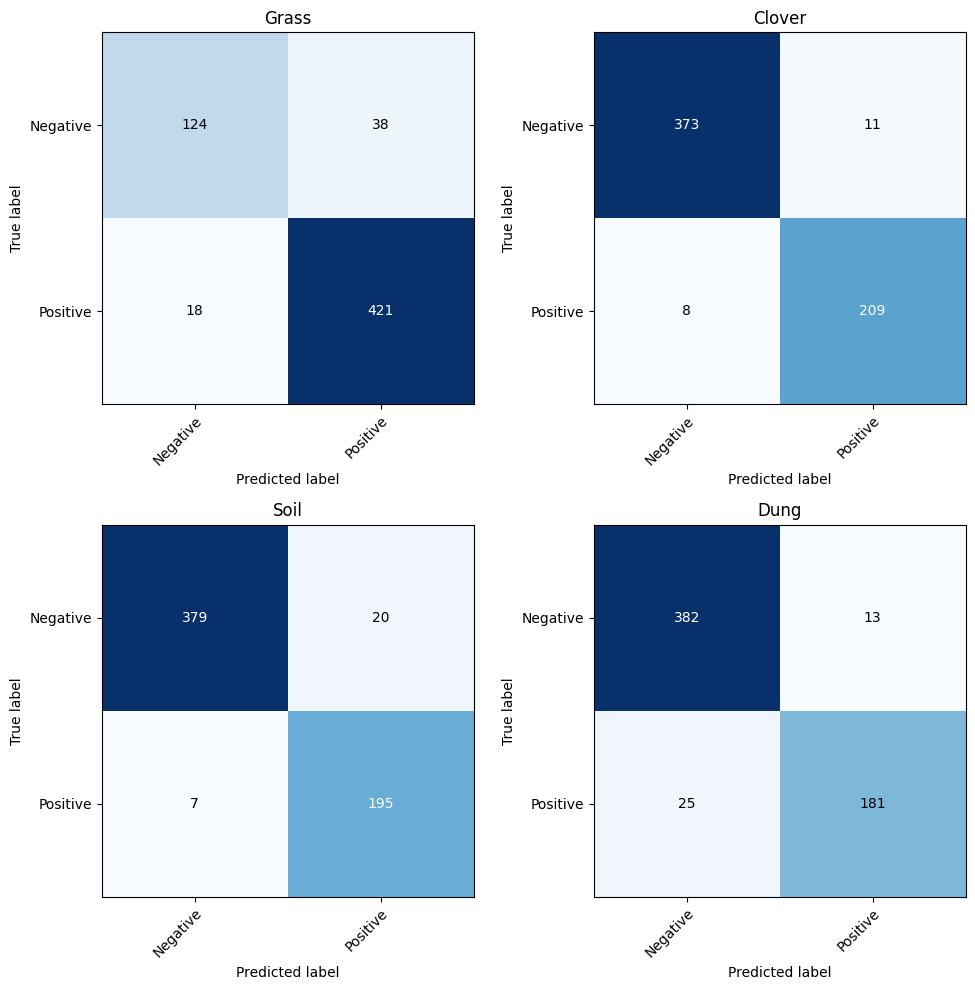

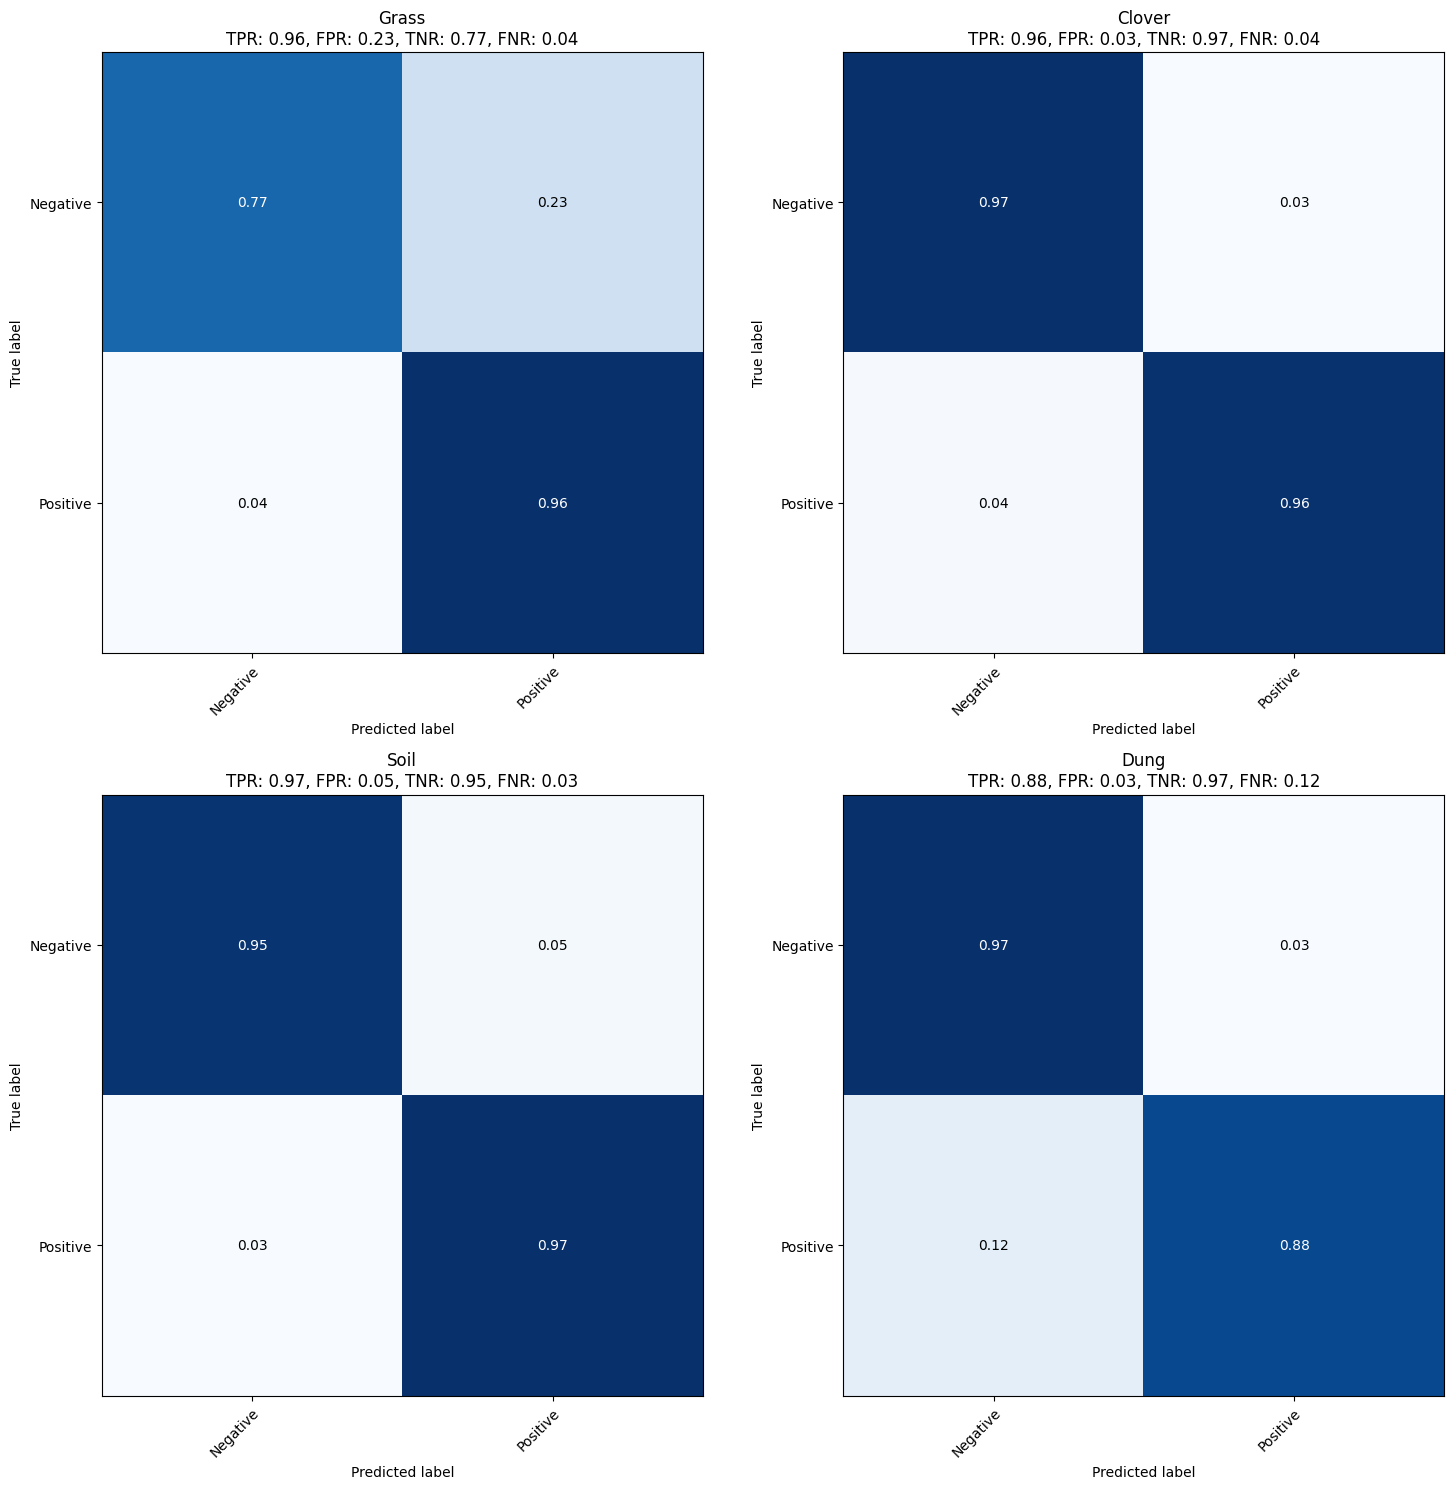

In [14]:
# Confusion matrix for non-augmented model

show_confusion(true_labels, label_map, non_aug_predictions)

Now do augmented model

In [15]:
# Evaulate augmented model on test set (inference)

from tqdm import tqdm
import numpy as np

# Detect if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
aug_iNaturalist_model.to(device)

aug_iNaturalist_model.eval()

aug_predictions = []

with torch.no_grad():
  for data in tqdm(val_dataset):
      inputs, labels = data
      inputs = inputs.unsqueeze(0).to(device)   # Add batch dimension and move to device

      output = aug_iNaturalist_model(inputs)
      predictions = (output > 0.5).float()      # Threshold value of 0.5

      aug_predictions.append(predictions.cpu().detach().numpy())

aug_predictions = np.squeeze(np.array(aug_predictions), axis=1)

100%|██████████| 601/601 [02:36<00:00,  3.83it/s]


In [16]:
# Compare Accuracy metrics for augmented model predictions

sklearn_acc = accuracy_score(true_labels, aug_predictions)

keras_bin_acc = BinaryAccuracy()
keras_bin_acc.update_state(true_labels, aug_predictions)

print("Accuracy of augmented model:")
print(f"sklearn = {sklearn_acc}")
print(f"keras binary = {keras_bin_acc.result()}")

keras_bin_acc.reset_state()

Accuracy of augmented model:
sklearn = 0.8369384359400999
keras binary = 0.9509151577949524


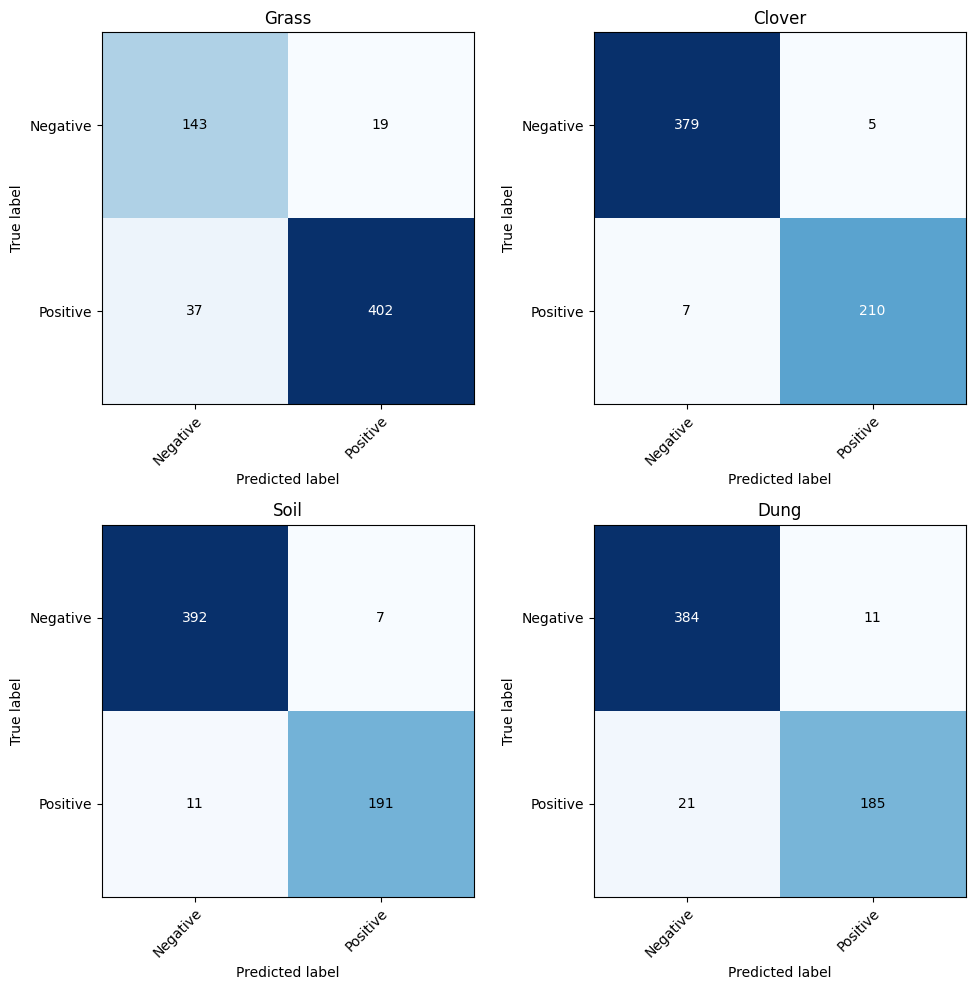

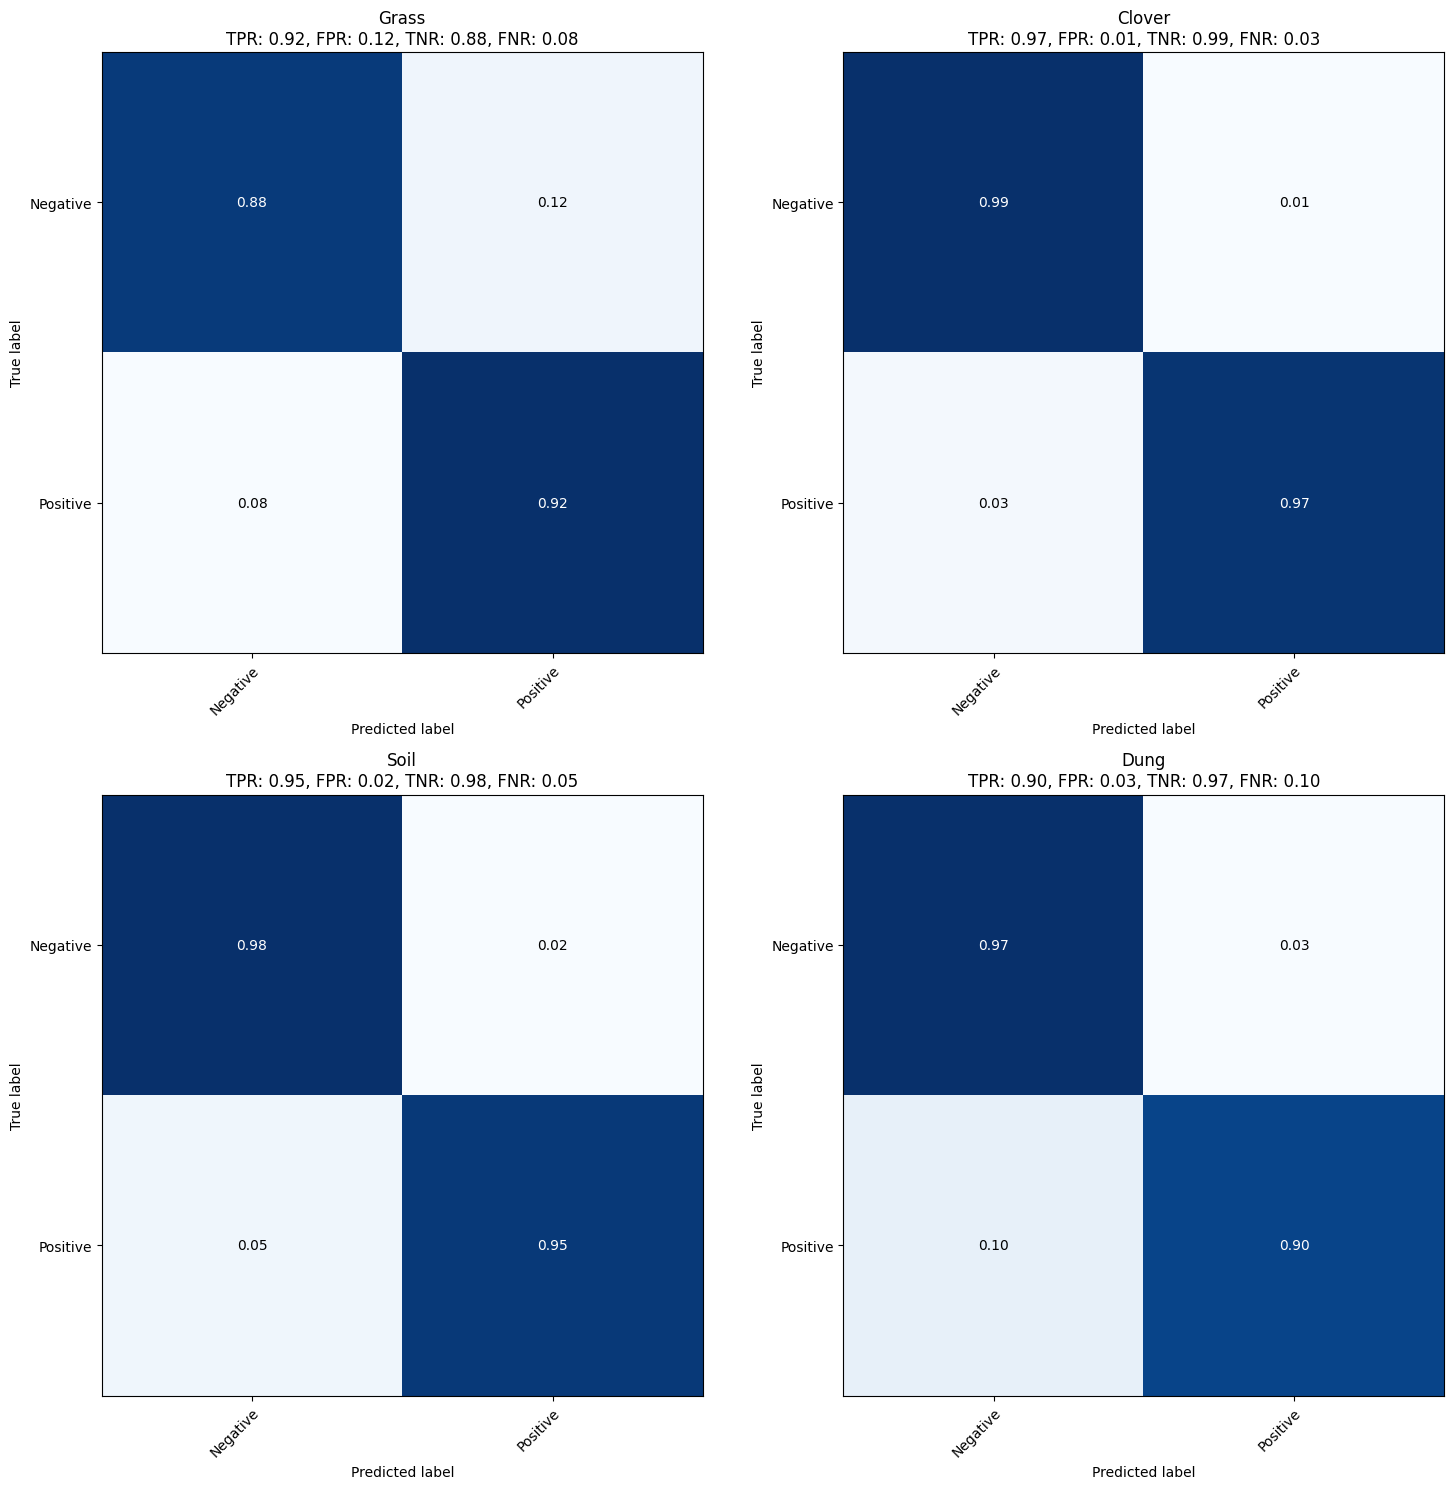

In [17]:
# Confusion matrix for non-augmented model

show_confusion(true_labels, label_map, aug_predictions)